In [2]:
from utils import utils, dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Loading local config
Dataset:  UNSW_NB15_50-50
Tenserflow Version:  2.13.1
Num GPUs Available:  0


In [2]:
dataset.change_dataset("ToN_IoT_80-20")
x_train, y_train = dataset.get_dataset(df=dataset.load_dataset_full(1))
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Dataset:  ToN_IoT_80-20
loading dataset:  1


In [3]:
x_test, y_test = dataset.get_dataset(df=dataset.load_dataset_test())

In [4]:
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

In [5]:
epochs = 10
batch_size = 256
class_weights = utils.calc_class_weights(y_train)

In [6]:
y_test = utils.label_to_categorical(y_test)
y_train = utils.label_to_categorical(y_train)
y_val = utils.label_to_categorical(y_val)

In [7]:
model = utils.get_model(inshape=x_train.shape[1])

Get model for ./dataset/ToN_IoT_80-20/


In [8]:
from tensorflow.keras.utils import plot_model

# model = Model(...)

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
history = model.fit(
    x_train,
    y_train,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    # validation_split = 0.2,
    validation_data=(x_val, y_val),
    class_weight=class_weights,
    workers=3
)

Epoch 1/10
93/93 [==============================] - 2s 13ms/step - loss: 1.5908 - acc: 0.5748 - f1_score: 0.4707 - precision: 0.8939 - recall: 0.2621 - val_loss: 0.9804 - val_acc: 0.7349 - val_f1_score: 0.6017 - val_precision: 0.8802 - val_recall: 0.4203
Epoch 2/10
93/93 [==============================] - 1s 12ms/step - loss: 1.0781 - acc: 0.7106 - f1_score: 0.6054 - precision: 0.8974 - recall: 0.4846 - val_loss: 0.8773 - val_acc: 0.6873 - val_f1_score: 0.5776 - val_precision: 0.8820 - val_recall: 0.5149
Epoch 3/10
93/93 [==============================] - 1s 12ms/step - loss: 0.9520 - acc: 0.7257 - f1_score: 0.6270 - precision: 0.8741 - recall: 0.5613 - val_loss: 0.7073 - val_acc: 0.7660 - val_f1_score: 0.6299 - val_precision: 0.8419 - val_recall: 0.6208
Epoch 4/10
93/93 [==============================] - 1s 11ms/step - loss: 0.8788 - acc: 0.7399 - f1_score: 0.6414 - precision: 0.8661 - recall: 0.6058 - val_loss: 0.7110 - val_acc: 0.7484 - val_f1_score: 0.6675 - val_precision: 0.8898 -

In [10]:
result, details = utils.get_model_result(model, x_test, y_test, batch_size)

print("Result:", result)
print("Details:", details)

124/124 [==============================] - 0s 3ms/step
normal : f1 = 1.0, precision = 1.0, recall = 1.0 
backdoor : f1 = 0.8979342004590666, precision = 0.8230014025245442, recall = 0.9878787878787879 
ddos : f1 = 0.6877117888353844, precision = 0.7418237783762985, recall = 0.6409574468085106 
dos : f1 = 0.9575928206932959, precision = 0.9992655159750276, recall = 0.9192567567567568 
injection : f1 = 0.6595166595166595, precision = 0.5876656472986749, recall = 0.751384815900945 
password : f1 = 0.35277449822904366, precision = 0.6102941176470589, recall = 0.24809033543673198 
ransomware : f1 = 0.8660500171291539, precision = 0.8732297063903282, recall = 0.8589874277947672 
scanning : f1 = 0.8343897285876809, precision = 0.8307443365695792, recall = 0.8380672543258244 
xss : f1 = 0.7364975450081833, precision = 0.8282208588957055, recall = 0.6630648330058939 
mitm : f1 = 0.1480719794344473, precision = 0.08094435075885328, recall = 0.8674698795180723 

Accuracy: 0.7996019837634646
Resul

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [12]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
predictions = model.predict(x_test)

990/990 [==============================] - 1s 889us/step


In [14]:
predictions

array([[9.9993026e-01, 7.1794911e-15, 1.4919701e-08, ..., 1.8547906e-08,
        8.4823519e-08, 6.8857764e-05],
       [7.5539128e-07, 1.6761362e-13, 9.1173965e-04, ..., 1.2861740e-06,
        4.5332172e-06, 6.4556552e-05],
       [3.3449701e-06, 7.5847679e-01, 8.7504186e-02, ..., 3.8861062e-02,
        4.9540540e-03, 5.2207080e-04],
       ...,
       [2.0887685e-06, 3.8394632e-10, 1.3602712e-02, ..., 3.6233306e-04,
        6.8167490e-03, 1.6196771e-02],
       [2.0871933e-06, 9.1214299e-01, 2.3321535e-03, ..., 8.3021827e-02,
        2.1427020e-05, 1.3164354e-04],
       [5.1859235e-05, 2.4036341e-03, 8.8542908e-02, ..., 6.4633577e-03,
        4.9396637e-01, 1.5994908e-02]], dtype=float32)

In [15]:
model_preds = predictions.argmax(axis=1)

In [16]:
model_preds

array([0, 3, 1, ..., 4, 1, 8], dtype=int64)

In [17]:
y_test.astype('int64')

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [18]:
confusion  = tf.math.confusion_matrix(
    labels=y_test.argmax(axis=1),
    predictions=model_preds,
    num_classes=10    
)

In [19]:
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[7413,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2934,    4,    0,    0,    0,    6,    2,    0,   24],
       [   0,   48, 1928,    2,   97,   15,   37,   16,   88,  777],
       [   0,    0,    2, 2721,    4,    1,    0,    1,    0,  231],
       [   0,    4,   70,    0, 2306,  439,   21,    3,  134,   92],
       [   0,  276,  407,    0, 1336,  747,    0,   43,    1,  201],
       [   0,    4,    2,    0,    0,    0, 2528,  202,  177,   30],
       [   0,  295,   82,    0,    4,    0,    3, 2567,   19,   93],
       [   0,    4,  102,    0,  162,   21,  297,  256, 2025,  187],
       [   0,    0,    2,    0,   15,    1,    3,    0,    1,  144]])>

In [134]:
def plot_confussion_matrix(model, x_test, y_test, batch_size, path):
    categories = dataset.get_output_feature_labels()
    pred = model.predict(x_test, batch_size=batch_size)
    
    confusion  = tf.math.confusion_matrix(
        labels=y_test.argmax(axis=1),
        predictions=pred.argmax(axis=1),
        num_classes=10    
    )
    print(confusion)
    conf_matrix = np.array(confusion)
    # print(conf_matrix)

    plt.figure().clear()
    plt.close()
    plt.clf()

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1)
    for i in range(conf_matrix.shape[0]):
        total = sum(conf_matrix[i])
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=f'{conf_matrix[i, j]}\n{conf_matrix[i, j]/total*100:.2f}%', va='center', ha='center', size='x-large')

    
    plt.xlabel('Predictions', fontsize=20)
    plt.ylabel('Actuals', fontsize=20)
    plt.xticks(np.arange(len(categories)), categories, rotation=26, fontsize=12)
    plt.yticks(np.arange(len(categories)), categories, fontsize=12)
    plt.title('Confusion Matrix', fontsize=30)
    plt.savefig(path, dpi = 300)
    

124/124 [==============================] - 0s 2ms/step
tf.Tensor(
[[7413    0    0    0    0    0    0    0    0    0]
 [   0 2935    2    0    0    5    2    3    0   23]
 [   0   27 1706    2   23   67   39    8  360  776]
 [   0    0    3 2721    3    1    0    1    1  230]
 [   0    3   63    0 1386 1152  133    3  237   92]
 [   0  309  339    0  590 1492    0   61   20  200]
 [   0    4    0    0    0    0 2315  113  502    9]
 [   0  304   47    0    1    1    0 2548   69   93]
 [   0    1   54    0   27   30   68  131 2556  187]
 [   0    0    1    0    5    5    5    0    5  145]], shape=(10, 10), dtype=int32)


<Figure size 640x480 with 0 Axes>

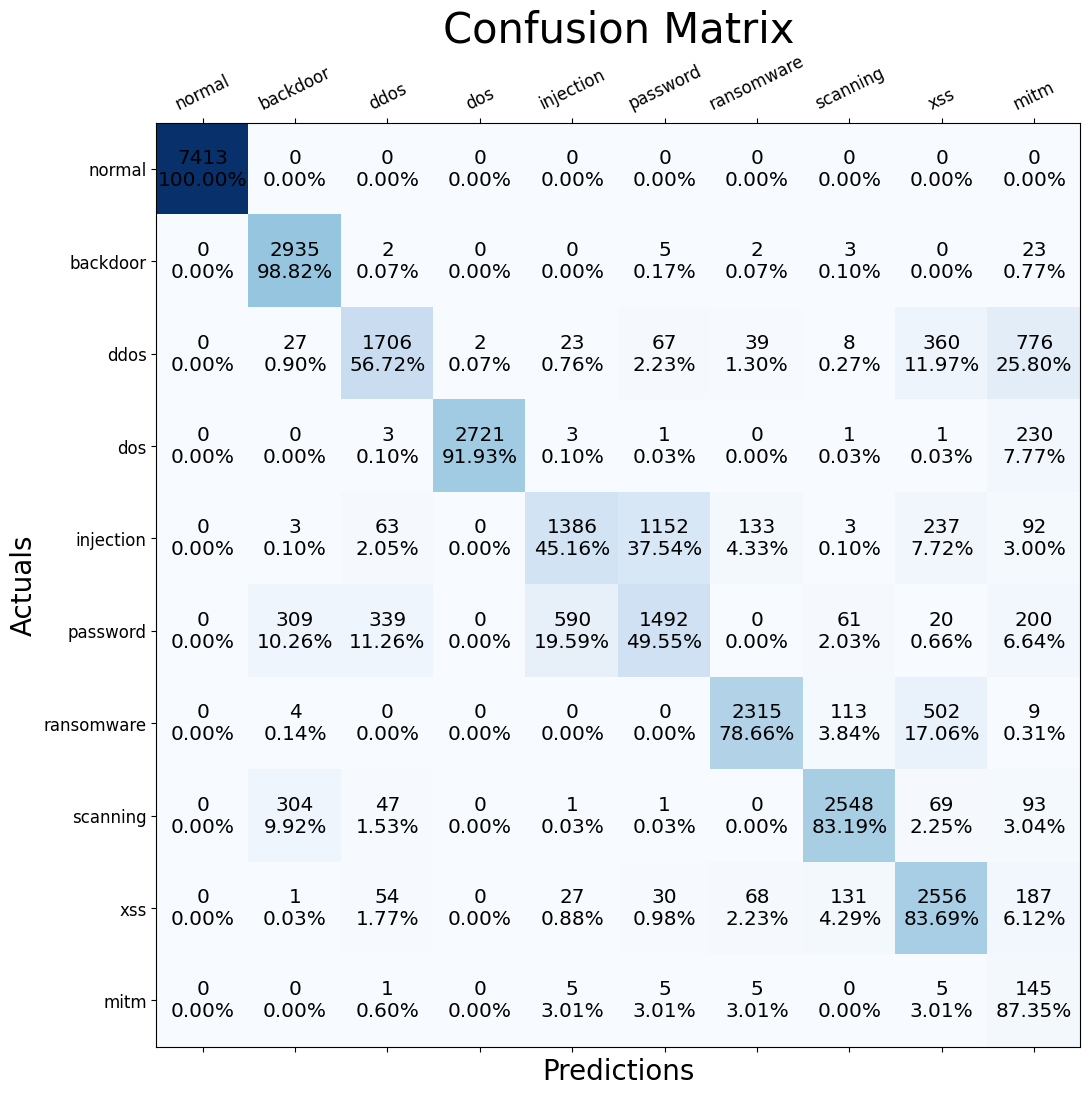

In [135]:
plot_confussion_matrix(model, x_test, y_test, batch_size, 'test.png')

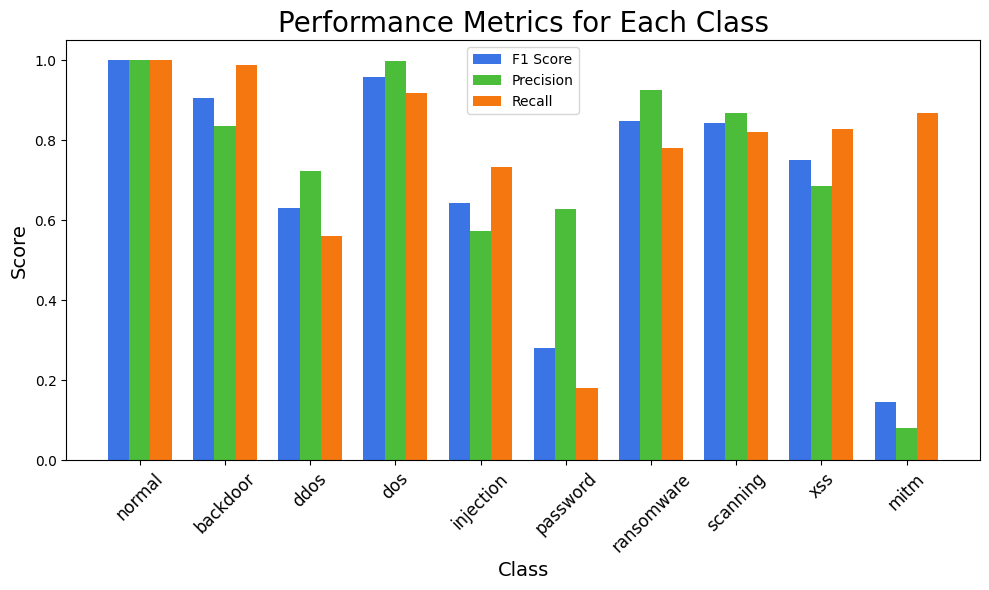

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['normal', 'backdoor', 'ddos', 'dos', 'injection', 'password', 'ransomware', 'scanning', 'xss', 'mitm']
f1_scores = [1.0, 0.9054450100262225, 0.6314804416994197, 0.9575928206932958, 0.6432347478211173, 0.2803304078471864, 0.847613782937166, 0.8434301057224366, 0.7510748702742772, 0.1458227848101266]
precisions = [1.0, 0.8354682607458013, 0.7224839400428266, 0.9992655159750276, 0.5727735368956743, 0.6292004634994206, 0.9259259259259259, 0.8677486187845304, 0.6862638851259821, 0.07960199004975124]
recalls = [1.0, 0.9882154882154882, 0.5608377659574468, 0.9192567567567568, 0.7334636689475399, 0.18033875788774492, 0.781515460414543, 0.8204374795951681, 0.8294040602488539, 0.8674698795180723]

# Transpose data
data = np.array([f1_scores, precisions, recalls])

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(categories))

plt.bar(index, data[0], bar_width, label='F1 Score', color='#3B74E5')
plt.bar(index + bar_width, data[1], bar_width, label='Precision', color='#4CBD3B')
plt.bar(index + 2*bar_width, data[2], bar_width, label='Recall', color='#F47710')

plt.ylabel('Score', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.xticks(index + bar_width, categories, rotation=45, fontsize=12)
plt.title('Performance Metrics for Each Class', fontsize=20)
plt.legend()

plt.tight_layout()
plt.show()


In [1]:

from sklearn.utils import compute_class_weight
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [98]:
def plot_model_result(model, x, y, batch_size, path):
    pred = model.predict(x, batch_size=batch_size)
    # Data
    categories = dataset.get_output_feature_labels()
    f1_scores = f1_score(y.argmax(axis=-1), pred.argmax(axis=-1), average=None)
    precisions = precision_score(y.argmax(axis=-1), pred.argmax(axis=-1), average=None)
    recalls = recall_score(y.argmax(axis=-1), pred.argmax(axis=-1), average=None)

    # Transpose data
    data = np.array([f1_scores, precisions, recalls])


    plt.figure().clear()
    plt.close()
    plt.clf()


    # Plotting
    plt.figure(figsize=(10, 6))

    bar_width = 0.25
    index = np.arange(len(categories))
    
    plt.grid(axis='y', color = '#5A616E', linestyle = '--', linewidth = 0.5)

    plt.bar(index, data[0], bar_width, label='F1 Score', color='#3B74E5')
    plt.bar(index + bar_width, data[1], bar_width, label='Precision', color='#4CBD3B')
    plt.bar(index + 2*bar_width, data[2], bar_width, label='Recall', color='#F47710')

    plt.ylabel('Score')
    plt.xlabel('Class')
    plt.xticks(index + bar_width, categories, rotation=45)
    plt.title('Performance Metrics for Each Class')
    plt.legend()

    plt.tight_layout()
    plt.savefig(path)

124/124 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

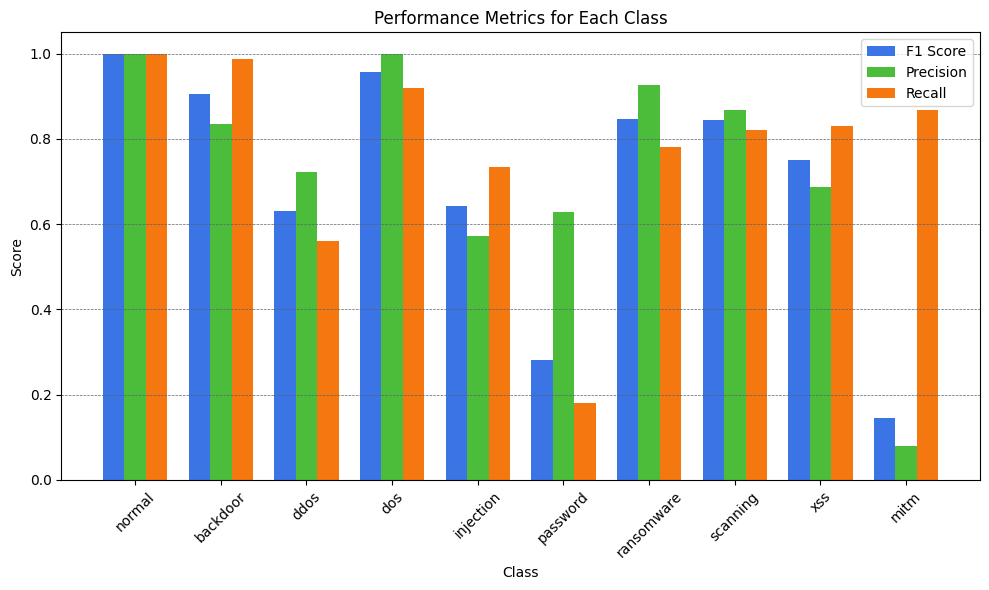

In [99]:
plot_model_result(model, x_test, y_test, batch_size, 'test2.png')

TypeError: '>' not supported between instances of 'int' and 'builtin_function_or_method'

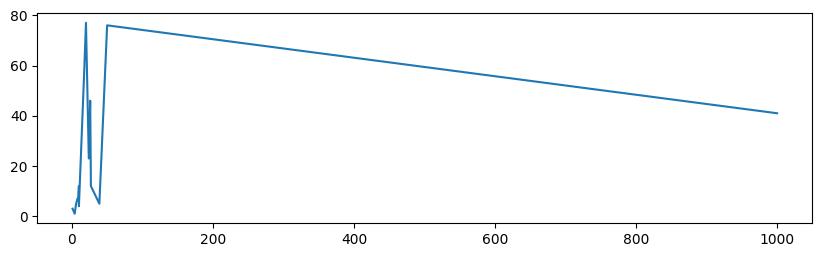

In [8]:

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot([1,4,6,8,9,10,10,17,20,24,26,27,39,50,1000], [3,1,5,7,7,12,4,54,77,23,46,12,5,76,41])
plt.xlim(0, min)
plt.ylim(0, 100)
plt.title('CPU Usage Over Time')
plt.grid(True)
plt.ylabel('Usage (%)')



plt.tight_layout()
plt.show()
